In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# RICE MSC Dataset from https://www.muratkoklu.com/datasets/
df = pd.read_csv('/content/Rice_MSC_Dataset.csv')

data = df.to_numpy()

print(data)

[[7805 437.915 209.8215 ... 0.3793 0.4733 'Basmati']
 [7503 340.757 138.3361 ... 0.3144 0.3641 'Arborio']
 [5124 314.617 141.9803 ... 0.3445 0.4448 'Jasmine']
 ...
 [7579 339.295 136.3125 ... 0.3164 0.3761 'Arborio']
 [15174 489.502 200.9486 ... 0.4215 0.4469 'Ipsala']
 [12931 452.635 185.5138 ... 0.4414 0.4626 'Ipsala']]


In [ ]:
data_x = data[:,:5] #using the first 5 atrributes from dataset
data_y = data[:,-1:]

print('data_x atrribute: area, perimeter, major_axis, minor_axis, eccentricity')
print('data_y atrribute: class - Basmati, Arborio, Jasmine, Ipsala, Karacadag')

data_x atrribute: area, perimeter, major_axis, minor_axis, eccentricity
data_y atrribute: class - Basmati, Arborio, Jasmine, Ipsala, Karacadag


In [ ]:
data_y.transpose()

array([['Basmati', 'Arborio', 'Jasmine', ..., 'Arborio', 'Ipsala',
        'Ipsala']], dtype=object)

In [ ]:
train_x, test_x = np.split(data_x,[int(0.80 * len(data_x))])
train_y, test_y = np.split(data_y,[int(0.80 * len(data_y))])

print(len(train_x))
print(len(test_x))

60000
15000


In [ ]:
# KNN Method
from sklearn.neighbors import KNeighborsClassifier
K = 5

def get_KNN(x,y,k):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(x, y)
  predict_labels = neigh.predict(x)
  return predict_labels

In [ ]:
#Naive Bayes Method
from sklearn.naive_bayes import GaussianNB

def get_Naive(x,y):
  gnb = GaussianNB()
  gnb.fit(train_x, train_y)

  pred = gnb.predict(train_x)
  return pred

In [ ]:
# Confusion Matrix
from sklearn import metrics

def get_conMatrix(y, predict_labels):

  confusion_matrix = metrics.confusion_matrix(y, predict_labels)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = 
                                            ['Basmati', 'Arborio', 'Jasmine', 'Ipsala', 'Karacadag'])

  cm_display.plot(include_values=None)
  plt.xlabel(' ')
  plt.ylabel(' ')
  plt.show()

  accuracy = metrics.accuracy_score(y, predict_labels)
  print('\nAccuracy:', accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


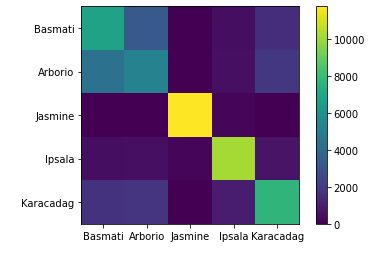


Accuracy: 0.6933833333333334


In [ ]:
# KNN on Train using area

X = train_x[:,:1]
Y = train_y

pTrain = get_KNN(X,Y,K)
get_conMatrix(Y,pTrain)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


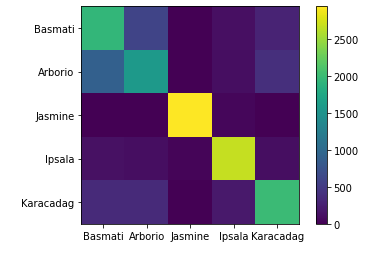


Accuracy: 0.7469333333333333


In [ ]:
#KNN on Test using area

X2 = test_x[:,:1]
Y2 = test_y

pTest = get_KNN(X2,Y2,K)
get_conMatrix(Y2, pTest)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


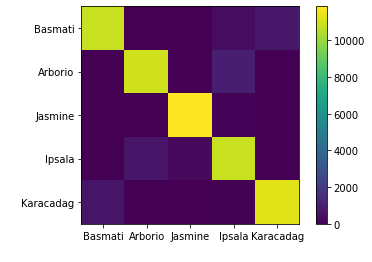


Accuracy: 0.93215


In [ ]:
#Naive on Train

nlabels = get_Naive(train_x, train_y)
get_conMatrix(train_y, nlabels)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


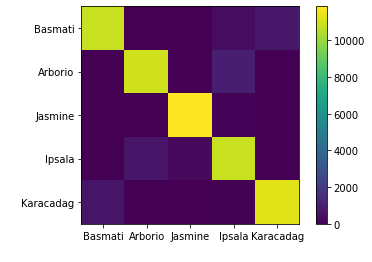


Accuracy: 0.93215


In [ ]:
#Naive on Test

nTestLabels = get_Naive(test_x, test_y)
get_conMatrix(train_y, nTestLabels)